### Center ASD and NT classification

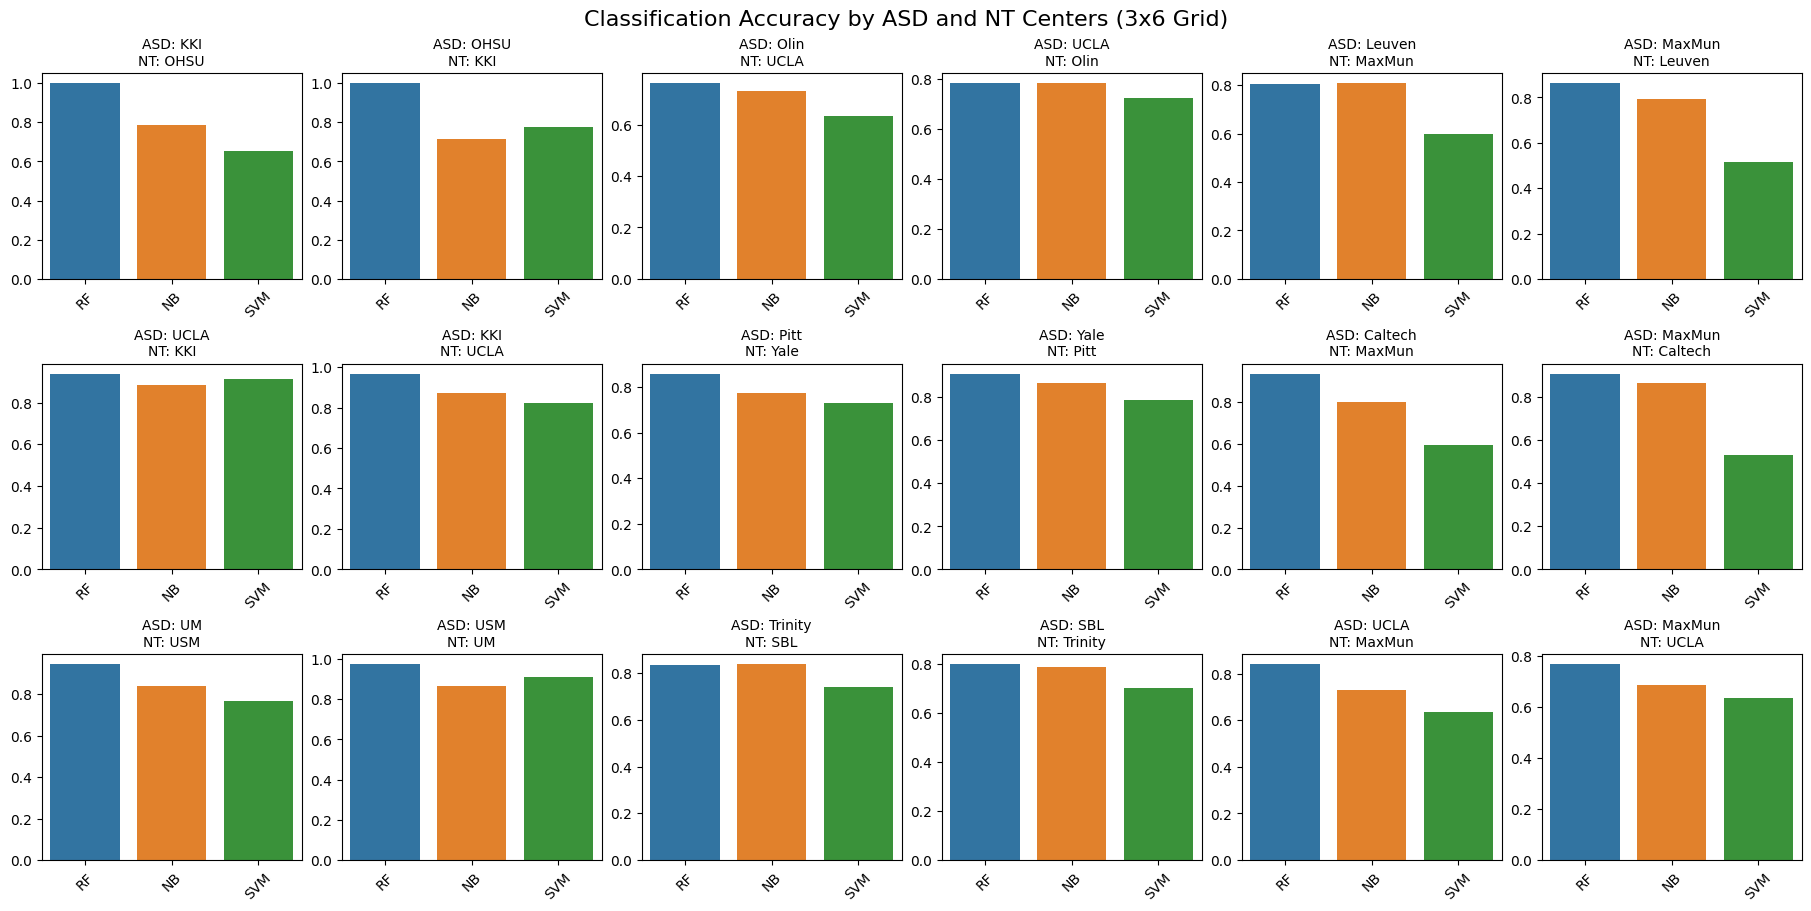

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from a CSV file
df = pd.read_csv("results/center_classification_asd_vs_hc_all.csv")

# Extract the ASD and NT centers for clarity in the titles
df['ASD Center'] = df['center'].str.extract(r'ASD: ([^ -]+)')
df['NT Center'] = df['center'].str.extract(r'NT: ([^ -]+)')

# Get unique centers
unique_centers = df['center'].unique()

# Set up the grid dimensions
n_rows = 3
n_cols = 6
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 9), constrained_layout=True)

# Flatten axes for easier iteration
axes = axes.flatten()

# Define the desired order for the bars
method_order = ['RF', 'NB', 'SVM']

# Loop through each center and create a bar plot
for i, center in enumerate(unique_centers):
    # Select the data for the current center
    center_data = df[df['center'] == center]
    
    # Plot on the corresponding subplot
    ax = axes[i]
    sns.barplot(
        data=center_data,
        x='method',
        y='acc',
        hue='method',  # Assign 'method' to hue for color differentiation
        hue_order=method_order,  # Set the desired order for the bars
        dodge=False,   # Prevent splitting bars by hue
        ax=ax,
        order=method_order,  # Ensure x-axis bar order matches the method order
        legend=False   # Suppress legend for individual plots
    )
    # Extract ASD and NT centers for the title
    asd_center = center_data['ASD Center'].iloc[0]
    nt_center = center_data['NT Center'].iloc[0]
    ax.set_title(f"ASD: {asd_center}\nNT: {nt_center}", fontsize=10)  # Set title with both centers
    ax.set_xlabel('')  # Remove x-axis label
    ax.set_ylabel('')  # Remove y-axis label
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Remove empty subplots if there are fewer centers than grid slots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Set a main title for the figure
fig.suptitle('Classification Accuracy by ASD and NT Centers (3x6 Grid)', fontsize=16)

# Show the plot
plt.show()

#### Center classification

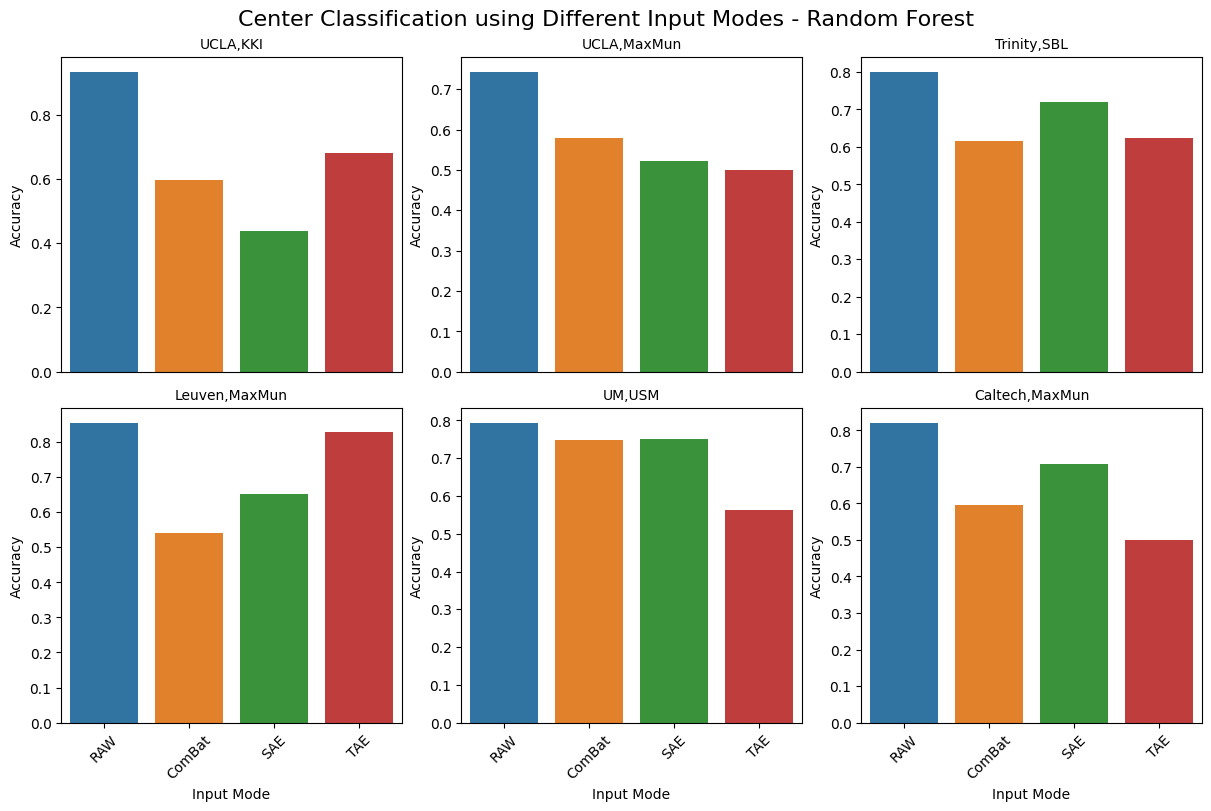

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv('results/center-classification-RF-with-without-combat-AEs.csv')

# Create a 'Condition' column that combines InputType and ComBat status for column headers in the bar chart
data['Input Mode'] = data['ComBat']

# Explicitly set the desired order for 'Input Mode'
desired_order = ['RAW', 'ComBat', 'SAE', 'TAE']
data['Input Mode'] = pd.Categorical(data['Input Mode'], categories=desired_order, ordered=True)

# Get unique Center Combinations
unique_centers = data['Center Combination'].unique()

# Set up the grid dimensions
n_cols = 3  # Adjust based on number of facets
n_rows = (len(unique_centers) + n_cols - 1) // n_cols  # Calculate rows needed
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4), constrained_layout=True)

# Flatten axes for easier iteration
axes = axes.flatten()

# Loop through each center combination and create a bar plot
for i, center in enumerate(unique_centers):
    # Select data for the current center
    center_data = data[data['Center Combination'] == center]
    
    # Plot on the corresponding subplot
    ax = axes[i]
    sns.barplot(
        data=center_data,
        x='Input Mode',
        y='Accuracy',
        hue='Input Mode',  # Assign x variable to hue
        dodge=False,       # Ensure bars are not split by hue
        legend=False,      # Suppress legend
        ax=ax
    )
    ax.set_title(center, fontsize=10)  # Set the title as the center combination
    ax.set_xlabel('Input Mode')  # Label x-axis
    ax.set_ylabel('Accuracy')  # Label y-axis
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Remove x-axis text in the first row
for i in range(n_cols):
    if i < len(axes):  # Ensure there are enough axes
        axes[i].set_xlabel('')  # Remove x-axis label
        axes[i].set_xticks([])  # Remove x-axis ticks

# Remove empty subplots if there are fewer centers than grid slots
for j in range(len(unique_centers), len(axes)):
    fig.delaxes(axes[j])

# Set a main title for the figure
fig.suptitle('Center Classification using Different Input Modes - Random Forest', fontsize=16)

# Show the plot
plt.show()

### Propotional Split

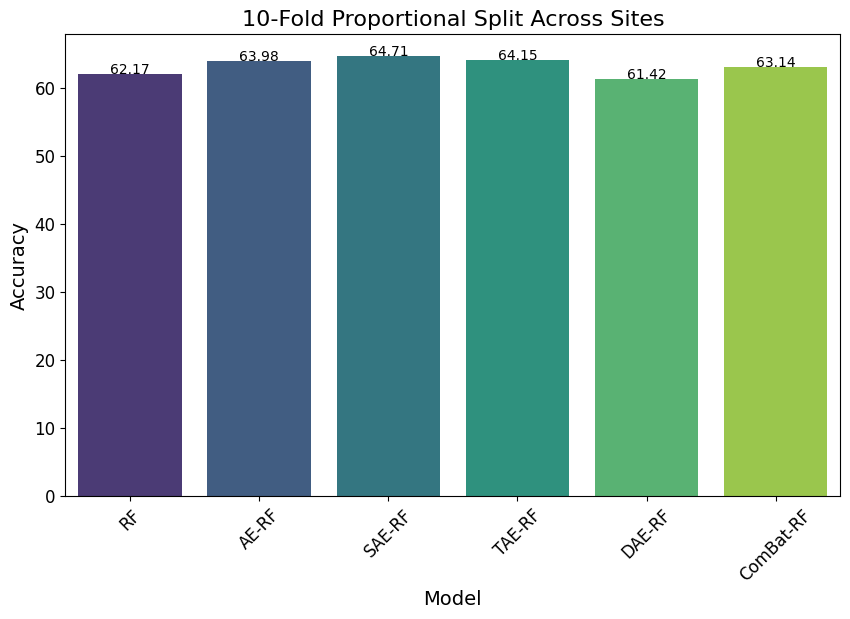

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('results/propotional_results.csv')

# Create the plot
plt.figure(figsize=(10, 6))

# Use a barplot with the viridis color scheme
barplot = sns.barplot(
    data=df,
    x='Model',
    y='Acc',
    hue='Model',  # Assign 'Model' to hue for color differentiation
    dodge=False,  # Prevent splitting bars by hue
    legend=False,  # Suppress legend
    palette='viridis'
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Set axis labels and title
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('10-Fold Proportional Split Across Sites', fontsize=16)

# Add value annotations on top of bars
for i, row in df.iterrows():
    plt.text(i, row['Acc'] + 0.01, f"{row['Acc']:.2f}", ha='center', fontsize=10)

# Set the y-axis limits
# plt.ylim(0, 0.8)

# Show the plot
plt.show()

### Leave One Site Out

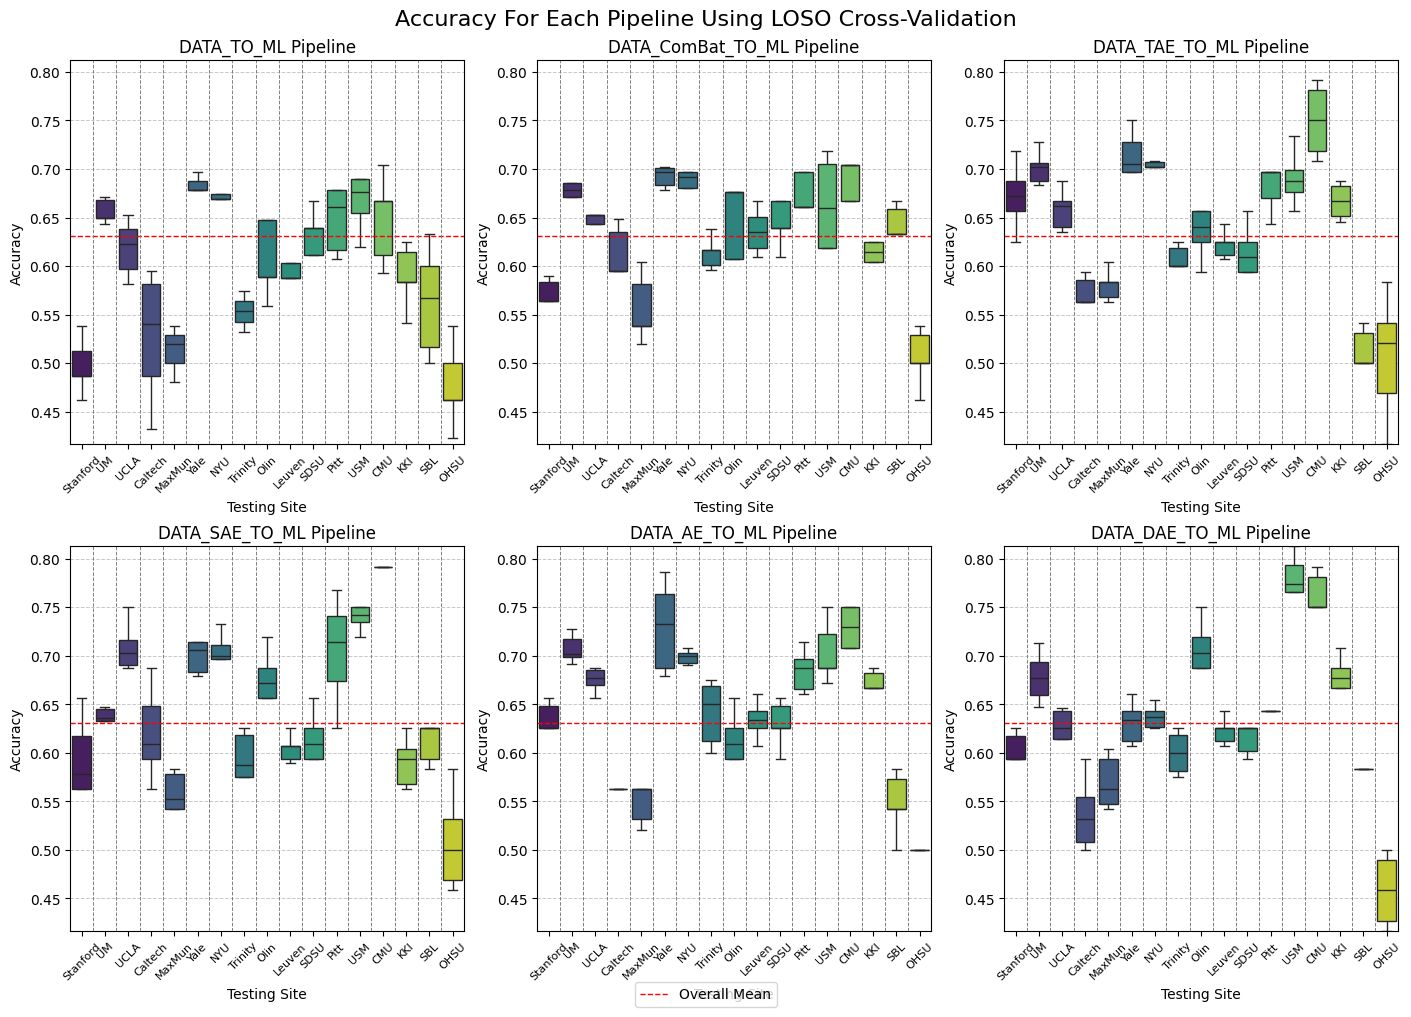

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# sns.set_style("whitegrid")
# sns.despine()
# Load the data
file_path = "results/leave_site_out_results.csv"
df = pd.read_csv(file_path)

# Explicitly set the desired order for methods
desired_order = ['DATA_TO_ML', 'DATA_ComBat_TO_ML', 'DATA_TAE_TO_ML', 'DATA_SAE_TO_ML', 'DATA_AE_TO_ML', 'DATA_DAE_TO_ML']

# Reorder the DataFrame based on the desired method order
df['method'] = pd.Categorical(df['method'], categories=desired_order, ordered=True)

# Ensure the methods are in the correct order
methods = desired_order

# Calculate the global y-axis limits
y_min = df['acc'].min()
y_max = df['acc'].max()

# Calculate the overall mean accuracy for the dotted line
overall_mean = df['acc'].mean()

# Create a grid of box plots: 2 rows, 3 columns (adjust based on the number of methods)
n_cols = 3
n_rows = -(-len(methods) // n_cols)  # Ceiling division
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 10), constrained_layout=True)

# Flatten axes for easier iteration
axes = axes.flatten()

# Get unique sites for vertical line placement
unique_sites = df['site'].unique()

# Iterate through methods and create a box plot for each method
for i, method in enumerate(methods):
    ax = axes[i]
    
    # Filter data for the current method
    method_data = df[df['method'] == method]
    
    # Plot the box plot
    sns.boxplot(
        data=method_data,
        x='site',
        y='acc',
        hue='site',  # Assign x variable to hue for color differentiation
        ax=ax,
        dodge=False,  # Prevent splitting by hue
        legend=False,  # Suppress legend
        palette='viridis',  # Optional: Color palette
        showfliers=False  # Disable outliers
    )
    
    # Add a horizontal dotted line for the overall mean
    ax.axhline(overall_mean, color='red', linestyle='--', linewidth=1, label='Overall Mean')
    
    # Add grid lines
    ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)  # Horizontal grid lines for better readability
    
    # Add vertical lines to separate sites
    for j in range(len(unique_sites) - 1):
        ax.axvline(j + 0.5, color='gray', linestyle='--', linewidth=0.7)  # Add vertical dashed line
    
    # Set the title and labels
    ax.set_title(f'{method} Pipeline', fontsize=12)
    ax.set_xlabel('Testing Site', fontsize=10)
    ax.set_ylabel('Accuracy', fontsize=10)
    ax.tick_params(axis='x', rotation=45, labelsize=8)
    
    # Set consistent y-axis limits
    ax.set_ylim(y_min, y_max)

# Remove any unused subplots
for j in range(len(methods), len(axes)):
    fig.delaxes(axes[j])

# Add a main title
fig.suptitle('Accuracy For Each Pipeline Using LOSO Cross-Validation', fontsize=16)

# Add a legend for the dotted line (added to the last subplot)
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.03), ncol=2, fontsize=10)

# Show the plot
plt.show()

### ANOVA Test

In [18]:
import scipy.stats as stats
from scipy.stats import f_oneway
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd


file_path = "results/leave_site_out_results.csv"
df = pd.read_csv(file_path)

# Perform ANOVA
groups = [group for name, group in df.groupby('method')['acc']]
f_stat, p_val = f_oneway(*groups)

# Calculate degrees of freedom
n_groups = len(groups)
n_total = len(df)
df_between = n_groups - 1
df_within = n_total - n_groups

# Calculate eta-squared (effect size)
def eta_squared(f_stat, df_between, df_within):
    return (f_stat * df_between) / (f_stat * df_between + df_within)

eta_sq = eta_squared(f_stat, df_between, df_within)


def format_p_value(p):
    if p < 0.001:
        return "p < 0.001"
    else:
        return f"p = {p:.3f}"

# Create formatted string
result = (f"F({df_between}, {df_within}) = {f_stat:.2f}, "
         f"{format_p_value(p_val)}, "
         f"η² = {eta_sq:.3f}")

print("Statistical Report Format:")
print(result)

# For Tukey's HSD results
tukey = pairwise_tukeyhsd(df['acc'], df['method'])
print("\nPost-hoc comparisons:")
print(tukey)

Statistical Report Format:
F(5, 613) = 7.97, p < 0.001, η² = 0.061

Post-hoc comparisons:
           Multiple Comparison of Means - Tukey HSD, FWER=0.05            
      group1            group2      meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------
    DATA_AE_TO_ML DATA_ComBat_TO_ML  -0.0156 0.6563 -0.0449  0.0138  False
    DATA_AE_TO_ML    DATA_DAE_TO_ML  -0.0115 0.8596 -0.0402  0.0171  False
    DATA_AE_TO_ML    DATA_SAE_TO_ML   0.0003    1.0 -0.0283  0.0289  False
    DATA_AE_TO_ML    DATA_TAE_TO_ML  -0.0037 0.9991 -0.0324  0.0249  False
    DATA_AE_TO_ML        DATA_TO_ML  -0.0497    0.0 -0.0773 -0.0221   True
DATA_ComBat_TO_ML    DATA_DAE_TO_ML    0.004 0.9988 -0.0254  0.0334  False
DATA_ComBat_TO_ML    DATA_SAE_TO_ML   0.0159 0.6367 -0.0135  0.0453  False
DATA_ComBat_TO_ML    DATA_TAE_TO_ML   0.0118 0.8602 -0.0176  0.0412  False
DATA_ComBat_TO_ML        DATA_TO_ML  -0.0341 0.0082 -0.0625 -0.0057   True
   DATA_DA

### Plot Average with 95 CL

/tmp/ipykernel_1799562/940756892.py:26: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  ci = stats.t.interval(alpha=0.95,


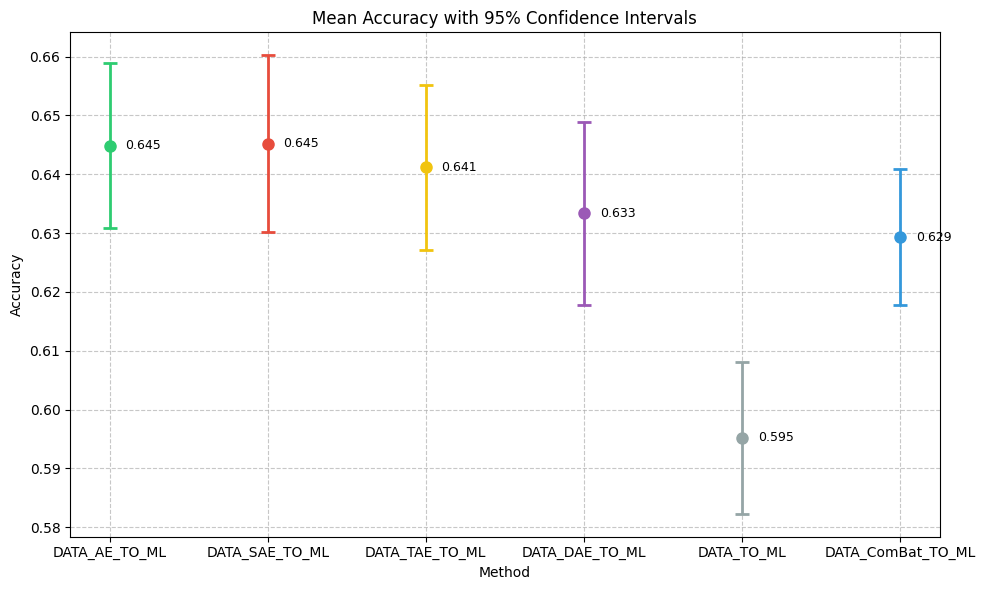

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Set figure size 
plt.figure(figsize=(10, 6))


file_path = "results/leave_site_out_results.csv"
df = pd.read_csv(file_path)


# Define custom colors for each method
colors = {
  'DATA_AE_TO_ML': '#2ecc71',     # green
  'DATA_ComBat_TO_ML': '#3498db',  # blue
  'DATA_DAE_TO_ML': '#9b59b6',     # purple
  'DATA_SAE_TO_ML': '#e74c3c',     # red
  'DATA_TAE_TO_ML': '#f1c40f',     # yellow
  'DATA_TO_ML': '#95a5a6'          # gray
}

# Calculate statistics for each method
def calculate_ci(data):
  ci = stats.t.interval(alpha=0.95, 
                       df=len(data)-1,
                       loc=np.mean(data),
                       scale=stats.sem(data))
  return np.mean(data), ci[0], ci[1]

# Add grid before plotting points
plt.grid(True, linestyle='--', alpha=0.7, zorder=1)  # zorder=1 puts grid behind points

methods = df['method'].unique()
x_pos = np.arange(len(methods))
means = []
ci_lower = []
ci_upper = []

for method in methods:
  mean, ci_low, ci_high = calculate_ci(df[df['method'] == method]['acc'])
  means.append(mean)
  ci_lower.append(ci_low)
  ci_upper.append(ci_high)
  
  # Plot each method with its specific color (zorder=2 puts points in front of grid)
  plt.errorbar(x_pos[list(methods).index(method)], mean,
              yerr=[[mean-ci_low], [ci_high-mean]],
              fmt='o', capsize=5, capthick=2, elinewidth=2,
              color=colors[method], label=method,
              markersize=8, zorder=2)
  
  # Add accuracy value next to each point
  plt.text(x_pos[list(methods).index(method)] + 0.1, mean, 
           f'{mean:.3f}', 
           ha='left', 
           va='center',
           fontsize=9,
           zorder=2)  # ensure text is on top

# Customize the plot
plt.xticks(x_pos, methods)
plt.ylabel('Accuracy')
plt.xlabel('Method')
plt.title('Mean Accuracy with 95% Confidence Intervals')

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()